In [1]:
import numpy as np
data = np.load('imdb.npz',allow_pickle=True)
x_train = data['x_train']
x_test = data['x_test']
y_train = data['y_train']
y_test = data['y_test']

max_words=10000
max_review_length=500
x_train = [
    np.array(  [word for word in review if word<max_words]  ) for review in x_train
]
x_test = [
    np.array(  [word for word in review if word<max_words]  ) for review in x_test
]

from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(x_train,maxlen=max_review_length)
x_test = pad_sequences(x_test,maxlen=max_review_length)

/Users/aksharma/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential([
    Embedding(input_dim=max_words,output_dim=32),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping (
    patience=4,
    verbose=1,
    monitor='val_loss',
    restore_best_weights=True
)
history = model.fit(
    x_train,y_train,
    validation_data=(x_test,y_test),
    epochs=20,
    callbacks=[early_stopping]
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.6747 - loss: 0.5438 - val_accuracy: 0.8771 - val_loss: 0.2902
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9557 - loss: 0.1247 - val_accuracy: 0.8625 - val_loss: 0.3792
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9935 - loss: 0.0223 - val_accuracy: 0.8250 - val_loss: 0.8617
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9940 - loss: 0.0168 - val_accuracy: 0.8565 - val_loss: 0.6737
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9963 - loss: 0.0096 - val_accuracy: 0.8564 - val_loss: 0.7411
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 1.


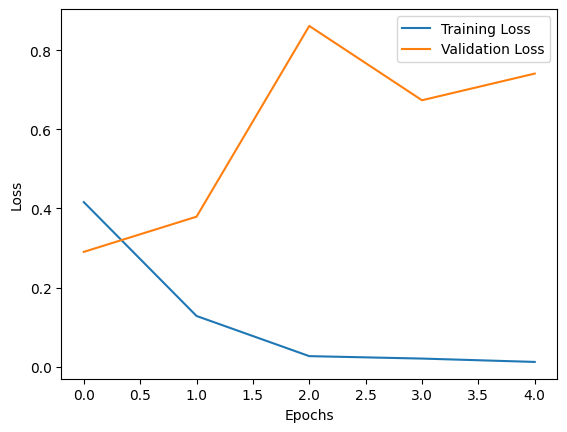

In [4]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='Training Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

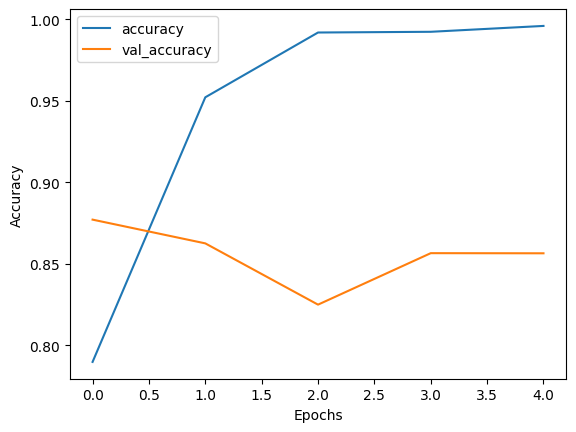

In [5]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [6]:
y_pred = (model.predict(x_test) > 0.5)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     12500
           1       0.90      0.84      0.87     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



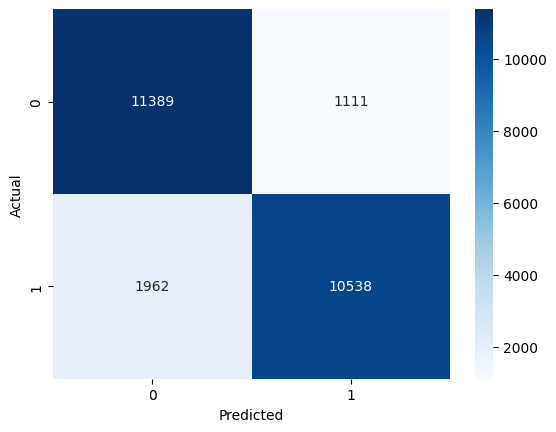

In [8]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
import seaborn as sns
sns.heatmap(cm,cmap='Blues',annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()